In [111]:
import scipy.stats as ss
import statsmodels.stats.power as smp
import numpy as np
from statsmodels.stats.power import TTestIndPower
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

INTRODUCCIÓN:
La presencia de microplásticos (MPs: partículas de plástico de tamaño menor a 5mm) ha sido descripta en numerosos ecosistemas acuáticos, tanto de lugares altamente antropizados como de zonas remotas. Las zonas estuarinas, al ser comúnmente zonas de desembocaduras de ríos y con una importante presencia de actividades recreativas y/o productivas, permitirían la depositación y/o presencia de MPs en sus sedimentos. Los estuarios de la provincia de Buenos Aires se caracterizan por presentar una diferencia de presión antrópica que incide en la depositación de contaminantes. En este trabajo se evaluó la presencia de MPs en sedimentos intermareales provenientes de 4 ambientes estuarinos: Samborombón(SAM), MarChiquita(MCH), Quequén Grande(QQ) y Bahía Blanca(BB) analizando su distribución vertical en los primeros 30cm. 

- HIPÓTESIS: La presencia de MPs es distinta entre los estuarios y en su distribución vertical (profundidad). 

- PREDICCIONES:
1) La presencia de MPs será meyor en aquellos estuarios que se encuentren bajo una mayor presión antrópica.
2) La presencia de MPs será mayor en la profundidad superior de su distribución vertical. 

- OBEJTIVOS: 
1) Comparar la cantidad MPs en las profundidades superior, media e inferior entre los estuarios.
2) Determinar la correlación entre la profundidad y la cantidad de MPS. 

TOMA DE MUESTRAS: Se analizaron sedimentos intermareales en 4 estuarios de la provincia de Buenos Aires, Argentina (Samborombón, Mar Chiquita, Quequén y Bahía Blanca; n:2 sitios por estuario). Se determinó el contenido de microplásticos (n:3 por sitio).
Se evaluó la distribución espacial a macroescala (dentro de sitios y entre estuarios). 

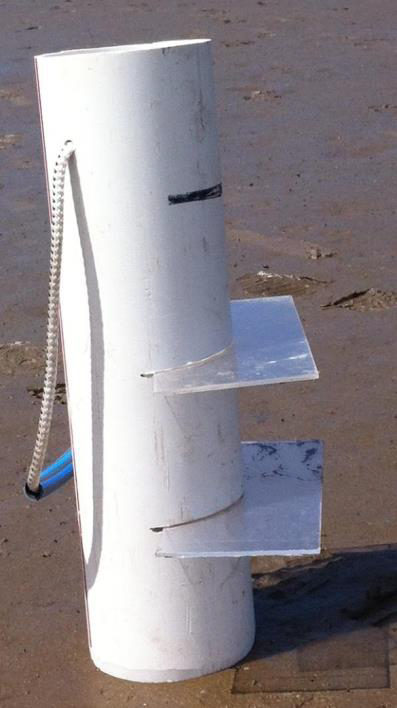

ANÁLISIS DE DATOS: 
A continuación se describe los análisis de datos que se realizaron. A mención de ordenamiento los mismos siguieron este orden:
- Limpieza de los datos (eliminación de datos faltantes y outliers) 
- Análisis de normalidad de la variable.
- Representación de forma gráfica la distribución de frecuencia de la variable.
- Determinación del tamaño muestral.
- Registro de las medidas características de cada distribución (mediana e intervalo intercuartil).
- Ensayos de hipótesis:
    - Análisis no paramétricos para comparación de grupos.
    - Análisis de correlación no paramétrico para medir la relación entre dos grupos. 

Apertura y visulización del data frame  

In [112]:
path = '/Users/rodri/OneDrive/Documentos/Esp. Bioinformática/Manejo de datos en biol computacional/'
MPS_Estuarios = pd.read_excel(path + 'Análisis de MPs en estuarios.xlsx')
MPS_Estuarios.head()

,ESTUARIO,FRANJA,PROFUNDIDAD,SITIOS,MPS,MMPS,TOTAL
0,MCH,SUPERIOR,SUPERIOR,Mch2 sup-a,82.558522,247.675565,330.234086
1,MCH,SUPERIOR,SUPERIOR,Mch2 sup-b,3018.161173,1957.726166,4975.887339
2,MCH,SUPERIOR,SUPERIOR,Mch2 sup-c,423.655571,677.848914,1101.504486
3,MCH,SUPERIOR,SUPERIOR,Mch1 sup-a,277.927859,111.171144,389.099002
4,MCH,SUPERIOR,SUPERIOR,Mch1 sup-b,570.793849,399.555694,970.349543


Se reazlizó una descripción de la tabla, para poder observar los parámteros principales de la misma. 

In [113]:
MPS_Estuarios.describe()

,MPS,MMPS,TOTAL
count,47.000000,43.000000,56.000000
mean,329.118640,331.302720,530.617733
std,477.083654,359.682278,728.588641
min,36.931577,56.012995,42.616481
25%,82.160998,128.886149,152.828994
50%,205.759059,175.434082,264.281128
75%,362.676457,379.174500,672.662603
max,3018.161173,1957.726166,4975.887339


Limpieza de los datos:
Como se conocía con anterioridad, la tabla contenía datos faltantes, por lo tanto se procedió a eliminar los mismos.

In [114]:
#Quitar los NAN
MPS_Estuarios2 = MPS_Estuarios.dropna ()


Evaluación de la ditribución de frecuencias de la variable: 
Se procedió a realizar el análisis de normalidad de los datos, tanto de forma gráfica, mediante un histograma de frecuencias, como mediante un test de Normalidad. 
El mismo arroja que los datos no se distrubuyen de forma normal. 

NormaltestResult(statistic=57.31569908903765, pvalue=3.5814103108054467e-13)

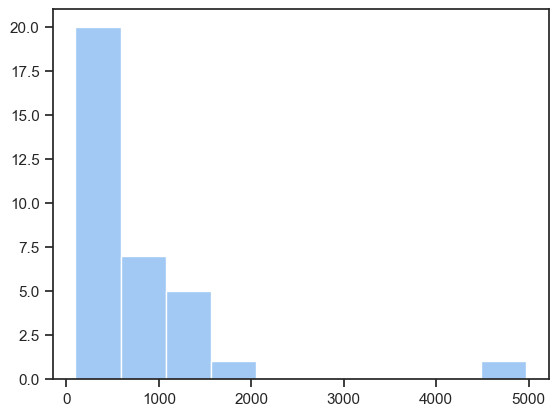

In [236]:
#Distribución de los datos MPS
plt.hist (MPS_Estuarios2 ['TOTAL'], bins= 10)
ss.normaltest (MPS_Estuarios2 ['TOTAL'])

Limpieza de datos: 
Al no encontrar normalidad en los datos, se planteó la posibilidad de que existan outliers en el data frame, por lo cual se procedió a realizar un análisis gráfico para una mejor visualización y luego a la eliminación de los mismos, el cual fue un solo dato. 

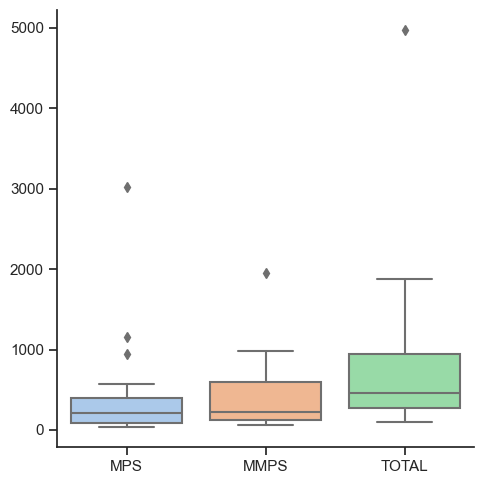

In [234]:
sns.catplot (x=None, y=None, kind="box", data= MPS_Estuarios2) 

In [117]:
#Quitar los outliers

z = np.abs(ss.zscore(MPS_Estuarios2 ['TOTAL']))

threshold = 3
print(np.where(z > threshold))

MPS_Estuarios3 = MPS_Estuarios2 [(z < threshold)]

(array([1], dtype=int64),)


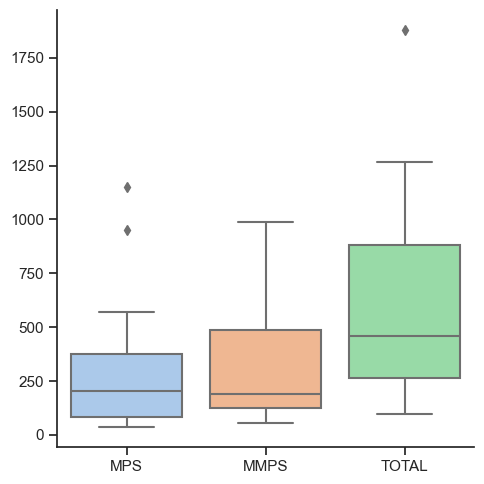

In [235]:
#Se volvió a graficar para observar el dato eliminado

sns.catplot(x=None, y=None, kind="box", data= MPS_Estuarios3)

Evaluación de la ditribución de frecuencias de la variable: 
Se prodeció nuevamente a realizar el análisis de normalidad de los datos, para observar si luego de la eliminación de outliers se pudo haber modificado la misma.
El anális arroja nuevamente que los datos no se distrubuyen de forma normal. 

NormaltestResult(statistic=6.912893030907619, pvalue=0.03154164586301479)

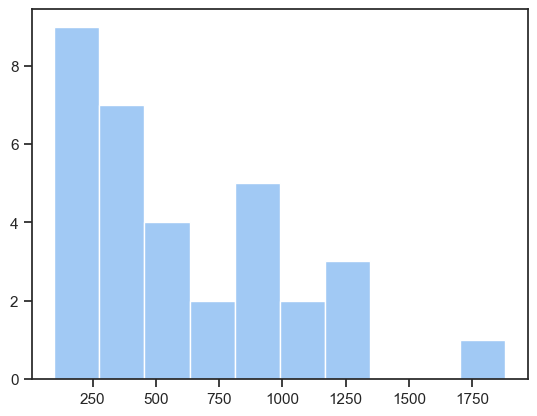

In [237]:
plt.hist (MPS_Estuarios3 ['TOTAL'], bins=10)
ss.normaltest (MPS_Estuarios3 ['TOTAL'])

Determinación de la medida de centralización de los datos (MEDIANA) y de dispersión (INTERVALO INTERCUARTIL)

In [224]:
mediana = MPS_Estuarios3['TOTAL'].median(axis=0, skipna=True, numeric_only=False)
print (mediana)

460.88259016015667


In [216]:
RI = MPS_Estuarios3 ['TOTAL'].quantile(0.75)-MPS_Estuarios3 ['TOTAL'].quantile(0.25)
print (RI)

619.2710572488813


Detrminación del tamaño de la muestra:
Se procedió a calcular el tamaño mínimo de muestra requerida para los consiguientes análisis. El mismo dio un resultado de 2.

In [159]:
effect_size = abs((MPS_Estuarios3['TOTAL'].max()- MPS_Estuarios3['TOTAL'].min())/MPS_Estuarios3['TOTAL'].std())   # diferencia de medias esperada
alpha = 0.05      # nivel de significancia
power = 0.8       # potencia
ratio = 1         # relación entre los tamaños de las muestras
n = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)
print("El tamaño muestral necesario es:", round(n))

El tamaño muestral necesario es: 2


Filtrado de los datos y contraste de hipótesis: 
Se procedió a filtrar los datos de acuerdo a las comparaciones que se querían hacer. Primeramente se filtraron aquellos datos que pertenecieran a la profunfidad SUPERIOR, luego a la profundidad MEDIA y finalmente profundidad FONDO, para poder hacer una comparación entre estuarios. 
De acuerdo a que la destribución de la variable no es normal, se procedió a realizar un análisis no paramétrico (Kruskal Wallis) para cada una de las comparaciones, con sus respectivos gráficos. 

In [225]:
#Prueba de Kruskal Wallis para profundidad superior

SUP_MCH = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'SUPERIOR'] [MPS_Estuarios3 ['ESTUARIO'] == 'MCH'] ['TOTAL']
SUP_QQ = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'SUPERIOR' ] [MPS_Estuarios3 ['ESTUARIO'] == 'QQ'] ['TOTAL']
SUP_SAM = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'SUPERIOR' ] [MPS_Estuarios3 ['ESTUARIO'] == 'SAM'] ['TOTAL']
SUP_BB = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'SUPERIOR'] [MPS_Estuarios3 ['ESTUARIO'] == 'BB'] ['TOTAL']

#Análisis no paramétrico
ss.kruskal (SUP_MCH,SUP_QQ,SUP_SAM,SUP_BB) 

C:\Users\rodri\AppData\Local\Temp\ipykernel_20380\2837125065.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  SUP_MCH = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'SUPERIOR'] [MPS_Estuarios3 ['ESTUARIO'] == 'MCH'] ['TOTAL']
C:\Users\rodri\AppData\Local\Temp\ipykernel_20380\2837125065.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  SUP_QQ = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'SUPERIOR' ] [MPS_Estuarios3 ['ESTUARIO'] == 'QQ'] ['TOTAL']
C:\Users\rodri\AppData\Local\Temp\ipykernel_20380\2837125065.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  SUP_SAM = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'SUPERIOR' ] [MPS_Estuarios3 ['ESTUARIO'] == 'SAM'] ['TOTAL']
C:\Users\rodri\AppData\Local\Temp\ipykernel_20380\2837125065.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  SUP_BB = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] =

KruskalResult(statistic=1.7085714285714317, pvalue=0.6350298551828351)

In [149]:
#Medidad de centralización
print (SUP_MCH.median (),SUP_QQ.median (),SUP_SAM.median(),SUP_BB.median())

970.349542737048 690.0878293601004 980.1910920233557 467.82421972767975


Text(0.5, 1.0, 'Profundidad superior')

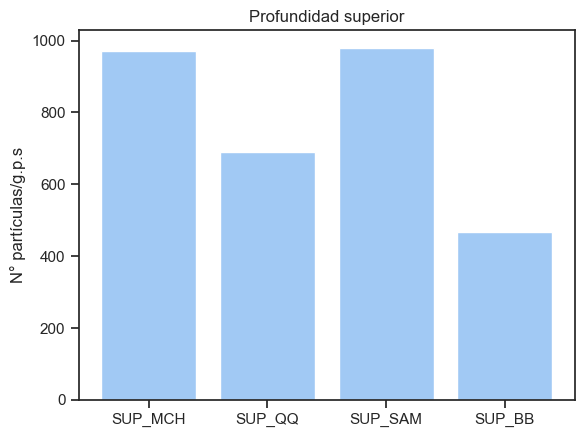

In [228]:
objects = ('SUP_MCH','SUP_QQ','SUP_SAM','SUP_BB')
y_pos = np.arange(len(objects))
performance = [SUP_MCH.median (),SUP_QQ.median (),SUP_SAM.median(),SUP_BB.median()]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('N° partículas/g.p.s')
plt.title('Profundidad superior')

El análisis arrojó que no se encontraron diferencias significativas entre los estuarios para la profundidad superior (pvalue=0.63). 

In [230]:
#Prueba de Kruskal Wallis para profundidad MEDIA

MED_MCH = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'MEDIO'] [MPS_Estuarios3 ['ESTUARIO'] == 'MCH'] ['TOTAL']
MED_QQ = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'MEDIO'] [MPS_Estuarios3 ['ESTUARIO'] == 'QQ'] ['TOTAL']
MED_SAM = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'MEDIO'] [MPS_Estuarios3 ['ESTUARIO'] == 'SAM'] ['TOTAL']
MED_BB = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'MEDIO'] [MPS_Estuarios3 ['ESTUARIO'] == 'BB'] ['TOTAL']

ss.kruskal (MED_MCH,MED_QQ,MED_SAM,MED_BB) 

C:\Users\rodri\AppData\Local\Temp\ipykernel_20380\2362066689.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MED_MCH = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'MEDIO'] [MPS_Estuarios3 ['ESTUARIO'] == 'MCH'] ['TOTAL']
C:\Users\rodri\AppData\Local\Temp\ipykernel_20380\2362066689.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MED_QQ = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'MEDIO'] [MPS_Estuarios3 ['ESTUARIO'] == 'QQ'] ['TOTAL']
C:\Users\rodri\AppData\Local\Temp\ipykernel_20380\2362066689.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MED_SAM = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'MEDIO'] [MPS_Estuarios3 ['ESTUARIO'] == 'SAM'] ['TOTAL']
C:\Users\rodri\AppData\Local\Temp\ipykernel_20380\2362066689.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MED_BB = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'MEDIO'] 

KruskalResult(statistic=nan, pvalue=nan)

In [144]:
print (MED_MCH.median (),MED_QQ.median (),MED_SAM.median(),MED_BB.median())

154.5896044426653 132.95478447098753 nan 341.5775267629575


Text(0.5, 1.0, 'Profundidad media')

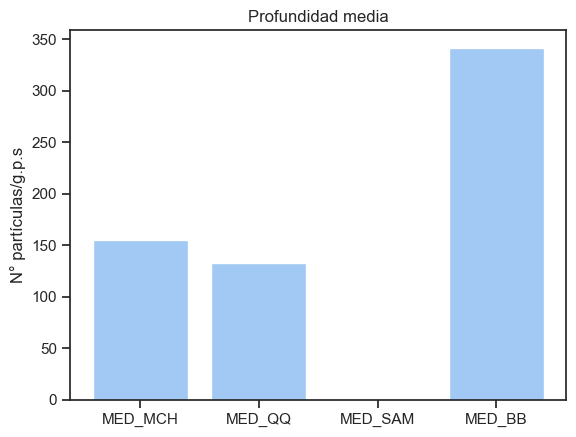

In [231]:
objects = ('MED_MCH','MED_QQ','MED_SAM','MED_BB')
y_pos = np.arange(len(objects))
performance = [MED_MCH.median (),MED_QQ.median (),MED_SAM.median(),MED_BB.median()]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('N° partículas/g.p.s')
plt.title('Profundidad media')

El análisis arrojó un resultado nan, lo cual indica que no hubo suficientes muestras para el análisis, así mismo se calculó las medianas de las distribuciones que evidencian la falta de muestra en el estuario de Samboronbón para la profundidad media.

In [229]:
#Prueba de Kruskal Wallis para profundidad FONDO

FON_MCH = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'FONDO'] [MPS_Estuarios3 ['ESTUARIO'] == 'MCH'] ['TOTAL']
FON_QQ = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'FONDO'] [MPS_Estuarios3 ['ESTUARIO'] == 'QQ'] ['TOTAL']
FON_SAM = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'FONDO'] [MPS_Estuarios3 ['ESTUARIO'] == 'SAM'] ['TOTAL']
FON_BB = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'FONDO'] [MPS_Estuarios3 ['ESTUARIO'] == 'BB'] ['TOTAL']

ss.kruskal (FON_MCH,FON_QQ,FON_SAM,FON_BB) 


C:\Users\rodri\AppData\Local\Temp\ipykernel_20380\1835585982.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FON_MCH = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'FONDO'] [MPS_Estuarios3 ['ESTUARIO'] == 'MCH'] ['TOTAL']
C:\Users\rodri\AppData\Local\Temp\ipykernel_20380\1835585982.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FON_QQ = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'FONDO'] [MPS_Estuarios3 ['ESTUARIO'] == 'QQ'] ['TOTAL']
C:\Users\rodri\AppData\Local\Temp\ipykernel_20380\1835585982.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FON_SAM = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'FONDO'] [MPS_Estuarios3 ['ESTUARIO'] == 'SAM'] ['TOTAL']
C:\Users\rodri\AppData\Local\Temp\ipykernel_20380\1835585982.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FON_BB = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'FONDO'] 

KruskalResult(statistic=nan, pvalue=nan)

In [148]:
print (FON_MCH.median (),FON_QQ.median (),FON_SAM.median(),FON_BB.median())

301.4404331096143 nan nan 1232.9886102677128


Text(0.5, 1.0, 'Profundidad fondo')

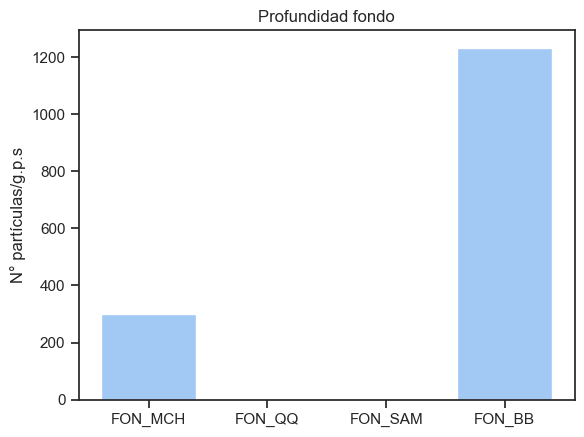

In [232]:
objects = ('FON_MCH','FON_QQ','FON_SAM','FON_BB')
y_pos = np.arange(len(objects))
performance = [FON_MCH.median (),FON_QQ.median (),FON_SAM.median(),FON_BB.median()]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('N° partículas/g.p.s')
plt.title('Profundidad fondo')

El análisis arrojó nan, lo cual indica que no hubo suficientes muestras para el análisis, así mismo se calculó las medianas de las distribuciones que evidencian la falta de muestra en el estuario de Samboronbón y Quequén para la profundidad Fondo.

De acuerdo a que no se registró diferencia entre los estuarios para cada una de las profundidades estudiadas, se procedió a realizar una comparación entre las profundidas SUPERIOR, MEDIA Y FONDO, teniendo en cuenta todos los estuarios. 
Como en los análisis anteriores se procedió a realizar un análisis no paramétrico (Kruskal Wallis).

In [131]:
#Análisis Kruskal Wallis para profundidades

SUP_ESTUARIOS = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'SUPERIOR'] ['TOTAL']
MED_ESTUARIOS = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'MEDIO'] ['TOTAL']
FOND_ESTUARIOS = MPS_Estuarios3 [MPS_Estuarios3 ['PROFUNDIDAD'] == 'FONDO'] ['TOTAL']

ss.kruskal (SUP_ESTUARIOS,MED_ESTUARIOS,FOND_ESTUARIOS) 

KruskalResult(statistic=8.310743087557597, pvalue=0.015679964254048023)

In [182]:
print (SUP_ESTUARIOS.median (),MED_ESTUARIOS.median (),FOND_ESTUARIOS.median())

607.2816769178124 244.81961690626343 767.2145216886636


Text(0.5, 1.0, '')

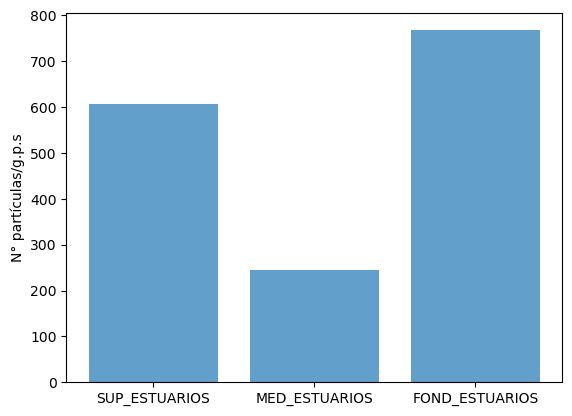

In [188]:
objects = ('SUP_ESTUARIOS','MED_ESTUARIOS','FOND_ESTUARIOS')
y_pos = np.arange(len(objects))
performance = [SUP_ESTUARIOS.median (),MED_ESTUARIOS.median (),FOND_ESTUARIOS.median()]

plt.bar(y_pos, performance, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('N° partículas/g.p.s')
plt.title('')

El test arrojó que se encuentran diferencias significativas entre las profundidades (pvalue=0.01). Debido a dicha diferencia, se procedió a realizar test a posteriori (Mann-Whitney U) para conocer entre cuales grupos se encontraba la diferencia. Los mismos arrojaron que se encontran diferencias significativas entre la profundidad superior y media (pvalue=0.002) y se realizó un gráfico box-plot para representar el mismo. 

In [150]:
ss.mannwhitneyu (SUP_ESTUARIOS, MED_ESTUARIOS, use_continuity=True, alternative='two-sided', axis=0, method='auto', nan_policy='propagate', keepdims=False) 

MannwhitneyuResult(statistic=122.0, pvalue=0.0026508113464635205)

In [151]:
ss.mannwhitneyu (SUP_ESTUARIOS, FOND_ESTUARIOS, use_continuity=True, alternative='two-sided', axis=0, method='auto', nan_policy='propagate', keepdims=False) 

MannwhitneyuResult(statistic=40.0, pvalue=1.0)

In [152]:
ss.mannwhitneyu (MED_ESTUARIOS, FOND_ESTUARIOS, use_continuity=True, alternative='two-sided', axis=0, method='auto', nan_policy='propagate', keepdims=False) 

MannwhitneyuResult(statistic=5.0, pvalue=0.10909090909090909)

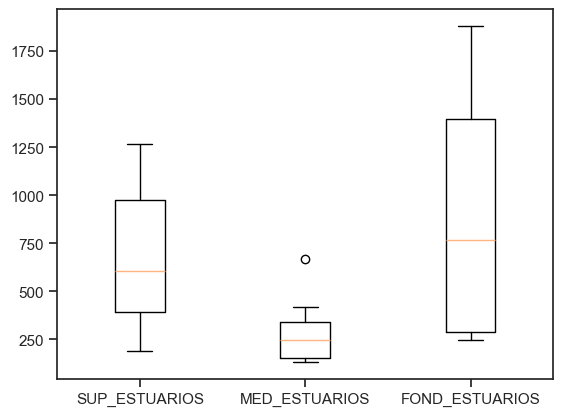

In [214]:
plt.boxplot ([SUP_ESTUARIOS,MED_ESTUARIOS,FOND_ESTUARIOS], labels=('SUP_ESTUARIOS','MED_ESTUARIOS','FOND_ESTUARIOS'))
plt.show ()

Análisis de Correlación: Se realizó un test para medir si existe un grado de relación entre la profundidad y la cantidad de MPs, el cual arrojó que no existe correlación entre las variables (pvalue=0.14).

In [92]:
# Se volvió a leer la tabla porque se convirtió la variable profundidad en dato discreto para poder realizar el test. 

path = '/Users/rodri/OneDrive/Documentos/Esp. Bioinformática/Manejo de datos en biol computacional/'
MPS_Estuarios_PROF = pd.read_excel(path + 'Análisis de MPs en estuarios 2.xlsx')
MPS_Estuarios_PROF.head()

,ESTUARIO,FRANJA,PROFUNDIDAD,SITIOS,MPS,MMPS,TOTAL
0,MCH,SUPERIOR,10,Mch2 sup-a,82.558522,247.675565,330.234086
1,MCH,SUPERIOR,10,Mch2 sup-b,3018.161173,1957.726166,4975.887339
2,MCH,SUPERIOR,10,Mch2 sup-c,423.655571,677.848914,1101.504486
3,MCH,SUPERIOR,10,Mch1 sup-a,277.927859,111.171144,389.099002
4,MCH,SUPERIOR,10,Mch1 sup-b,570.793849,399.555694,970.349543


In [96]:
MPS_Estuarios_PROF = MPS_Estuarios_PROF.dropna ()

In [99]:
#Quitar los outliers 

z = np.abs(ss.zscore(MPS_Estuarios_PROF ['TOTAL']))

threshold = 3
print(np.where(z > threshold))

MPS_Estuarios_P = MPS_Estuarios_PROF [(z < threshold)]

(array([1], dtype=int64),)


In [100]:
#CORRELACIÓN PROFUNDIDAD Y EL TOTAL DE MPS

ss.spearmanr (MPS_Estuarios_PROF ['PROFUNDIDAD'], MPS_Estuarios_PROF ['TOTAL'])

SignificanceResult(statistic=-0.2526013636255516, pvalue=0.1494978709586977)

<Axes: xlabel='PROFUNDIDAD', ylabel='TOTAL'>

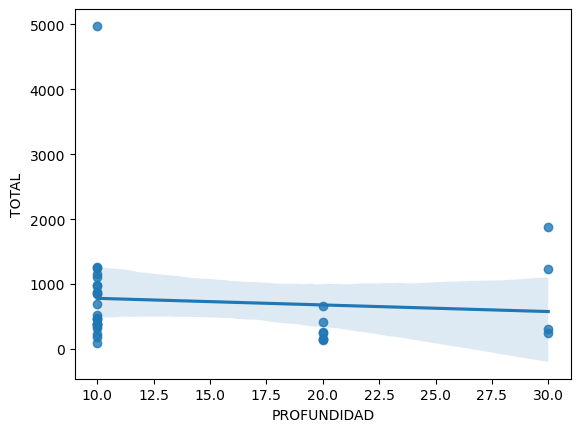

In [101]:
sns.regplot (x=MPS_Estuarios_PROF ['PROFUNDIDAD'], y=MPS_Estuarios_PROF ['TOTAL'])

DISCUSIÓN:
La presencia de MPs fue observada en todos los sedimentos intermareales estuarinos, con un mayor deposito en los sedimentos superficiales, si bien no se encontraron diferencias significativas entre los estuarios. 
Para las profundidades media y fondo el número de muestra no fue suficiente para el análisis, pero si se evidenció un gran número de partículas en el estuario de Bahía Blanca (341.55 y 1,232.98 N° partículas/g.p.s) para estas profundidades. La mayor presencia de MPs en el estrato inferior de este estuario puede evidenciar el proceso histórico de contaminación, acorde a sus importantes actividades productivas y concentración urbana. 
Para el próximo estudio se recomienda tomar una mayor cantidad de muestra o seleccionar otro sitio adicional por cada estuario, debido a que en el proceso de extracción de MPs de los sedimentos se pierde muestra. 
Los resultados obtenidos representan un primer análisis respecto a la presencia microplásticos en estos ecosistemas costeros de importancia del atlántico sudoccidental.
